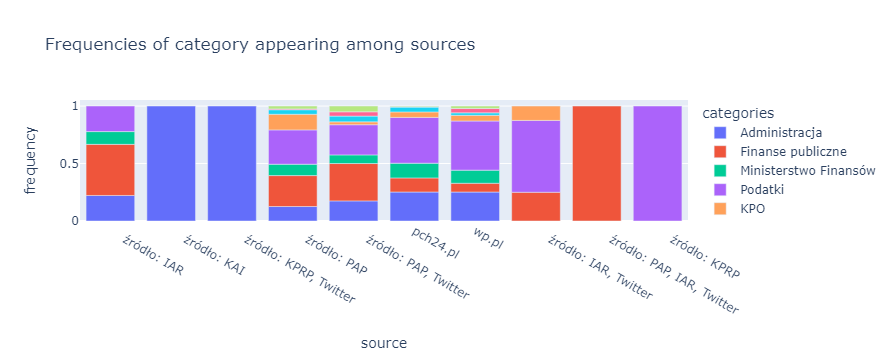

In [19]:
import pandas as pd
df = pd.read_csv('c:\\Users\\piotr\\PycharmProjects\\article_aggregator_frontend\\breakthefake\\data\\database.csv', lineterminator='\n')

def split_strip(string):
    return list(map(str.strip, string.split(',')))

df = df[['title', 'claimed_source', 'categories']]

# Drop N/A values in categories
df = df[df['categories'].notna()]
df = df[df['claimed_source'].notna()]

# Convert comma separated strings to lists of strings
df['categories'] = df['categories'].apply(split_strip)

# Unwind categories
df = df.explode('categories')

df_grouped = df.groupby(['claimed_source', 'categories']).count()

df_grouped_by_source = df.groupby('claimed_source').count()

df_grouped = df_grouped.iloc[1:]

df_grouped['frequency'] = df_grouped['title']

df_grouped['source_sum'] = df_grouped['title']

for i, row in df_grouped.iterrows():
    # print(i)
    df_grouped.at[i,'source_sum'] = float(df_grouped_by_source.loc[i[0]]['title'] * 1.0)
    # df_grouped.at[i,'frequency'] = float(row['title'] * 1.0) / float(df_grouped_by_source.loc[i[0]]['title'] * 1.0)

df_grouped['frequency'] = df_grouped['title'] / df_grouped['source_sum']

df_grouped_indexed = df_grouped.reset_index()

import plotly.graph_objects as go

import plotly.express as px

# wide_df = px.data.medals_wide()

# fig = px.bar(wide_df, x="nation", y=["gold", "silver", "bronze"], title="Wide-Form Input")
fig = px.bar(df_grouped_indexed, x="claimed_source", y="frequency", color="categories",
            title="Frequencies of category appearing among sources",
            )
fig.update_layout(xaxis={'title': 'source'})
fig.show()
